<a href="https://colab.research.google.com/github/Raghuram-Veeramallu/Astro_Stat_Proj3/blob/development/Project3_Group3_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AST/STAT 5731 Project 3

## Research Synopsis

**Group 3**   
Christopher Guo  
Daniel Warshofsky  
Hari Veeramallu  
Jacynda Alatoma  
Nicholas Kruegler  

### Research Question

What is the size distribution of sunspots above the lower bound of reliable size measurements?

### Preamble

Sunspots play an important role in the magnetic dynamics of the sun and can indicate local processes near the surface. They are also a signal of overall solar activity, so understanding their prevelance can be an important foundational tool for further research in the field. [Previous research](https://doi.org/10.1051/0004-6361:20053415) has modeled the number density of sunspots over all whole spot areas using a log-normal distribution, which is the prescription we will follow in this project.

This reference also recommends not using the full data set and only performs the fit above an area of $A_{min}=60$ millionths of a solar hemisphere (MSH) as they are "falsified from enhanced intrinsic measurement errors as well as from distortions due to atmospheric seeing". Therefore, this requires the use of a truncated log-normal to appropriately model the data, and we will only focus on the data with at least a size of 60 MSH.

### Data

The data for this project was obtained from the UK Solar System Data Centre https://www.ukssdc.ac.uk/wdcc1/greenwich/. It contains all sunspot group reports from 1874 to 1981. Because each year contains so much information and data, we selected years 1976 and 1968. The reason why 1968 was chosen as one of the years is because it was when the solar maximum, the most observed amount of sunspots in a solar cycle, occurred. 1976 was then chosen as it was the last year of the of the Greenwich sunspot record. Only the area of complete sunspot groups and not of individual sunspots have been recorded.

After selecting these two .grp files, we moved them into an excel sheet and separated the columns according to the grnwich.fmt file which tells what each column means. So for instance, columns 1-4 tell the year so we separated data by that.

[UK Solar System Data Center](https://www.ukssdc.ac.uk/wdcc1/greenwich/) (Need to register [here](https://www.ukssdc.ac.uk/cgi-bin/wdcc1/userreg.pl) and use email as the credential with password being blank.)  
[GDrive](https://drive.google.com/uc?id=1nOktHZ4Qs8jKDr2GPzAje64YlsDZdysb)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# downloads the dataset to colab
!gdown 1nOktHZ4Qs8jKDr2GPzAje64YlsDZdysb

Downloading...
From: https://drive.google.com/uc?id=1nOktHZ4Qs8jKDr2GPzAje64YlsDZdysb
To: /content/SunspotDist.csv
100% 225k/225k [00:00<00:00, 73.8MB/s]


In [ ]:
# on colab
data = pd.read_csv("./SunspotDist.csv")

# for local access, replpace the "./SunspotDist.csv" with the datapath

In [ ]:
data

,Year,Month,Day,Time in Thousandths of day,Greenwich sunspot group number,Mt. Wilson Magnetic Classification,Greenwich Group Type,Observed umbral area in millionths of solar disk,Observed whole spot area in millionths of solar disk,Corrected umbral area in millionths of solar hemisphere,Corrected whole spot area in millionths,Distance from center of solar disk in disk radii,Polar angle,Carrington Longitude,Latitude,Central meridian distance
0,1976,1,12,0.46,23680,0,7,1,19,1,12,0.596,261.1,34.1,-8.7,36.4
1,1976,1,13,0.421,23680,0,7,2,17,2,13,0.747,262.2,33.4,-8.7,48.4
2,1976,1,14,0.281,23680,0,7,2,12,2,12,0.863,263.4,33.4,-8.0,59.7
3,1976,1,12,0.46,23681,0,5,14,97,26,172,0.959,100.7,284.0,-11.4,-73.7
4,1976,1,13,0.421,23681,0,5,79,411,82,425,0.875,100.4,284.0,-11.2,-61.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3384,1968,12,20,0.285,154204,0,0,0,3,0,5,0.918,59.2,136.8,27.3,-62.2
3385,1968,12,21,0.475,154205,0,0,1,17,5,43,0.980,286.8,260.7,16.1,77.4
3386,1968,12,22,0.513,154206,0,0,0,12,0,7,0.421,212.3,183.8,-22.6,14.1
3387,1968,12,26,0.572,154207,0,0,0,17,0,9,0.323,321.5,128.1,12.2,11.9


In [ ]:
# total data description
data.describe()

,Year,Month,Day,Greenwich sunspot group number,Mt. Wilson Magnetic Classification,Greenwich Group Type,Observed umbral area in millionths of solar disk,Observed whole spot area in millionths of solar disk,Corrected umbral area in millionths of solar hemisphere,Corrected whole spot area in millionths,Distance from center of solar disk in disk radii,Polar angle,Carrington Longitude,Latitude,Central meridian distance
count,3389.000000,3389.000000,3389.000000,3389.000000,3389.0,3389.000000,3389.000000,3389.000000,3389.000000,3389.000000,3389.000000,3389.000000,3389.000000,3389.000000,3389.000000
mean,1969.005606,6.375922,15.872529,30555.838595,0.0,2.884332,36.800531,248.903216,27.996459,187.352316,0.645477,178.385099,161.383151,-0.261906,-0.342667
std,2.652486,3.360611,8.826628,32847.511201,0.0,2.799723,60.831330,417.971854,40.774895,280.386918,0.245082,97.891371,99.518933,17.932533,45.253175
min,1968.000000,1.000000,1.000000,21444.000000,0.0,0.000000,0.000000,1.000000,0.000000,1.000000,0.016000,0.000000,0.000000,-46.100000,-86.800000
25%,1968.000000,4.000000,8.000000,21579.000000,0.0,0.000000,4.000000,27.000000,3.000000,21.000000,0.448000,84.800000,84.600000,-15.500000,-37.000000
50%,1968.000000,6.000000,16.000000,21694.000000,0.0,2.000000,14.000000,87.000000,13.000000,83.000000,0.667000,172.900000,150.000000,4.500000,-1.200000
75%,1968.000000,9.000000,24.000000,21816.000000,0.0,5.000000,44.000000,287.000000,36.000000,231.000000,0.868000,272.300000,243.300000,15.500000,37.000000
max,1976.000000,12.000000,31.000000,164903.000000,0.0,9.000000,819.000000,5542.000000,449.000000,3202.000000,0.998000,359.600000,359.900000,41.400000,87.400000


In [ ]:
#arrays of the umbral and whole spot areas
umbral = data["Observed umbral area in millionths of solar disk"]
whole = data["Observed whole spot area in millionths of solar disk"]

#truncate the data to only include data from above the whole area cutoff of 60 MSH
trunc = data[whole>60]
whole_trunc = trunc["Observed whole spot area in millionths of solar disk"]

logarea_whole = np.log10(whole)
logarea = np.log10(whole_trunc)

In [ ]:
# total data description
data[whole>60].describe()

,Year,Month,Day,Greenwich sunspot group number,Mt. Wilson Magnetic Classification,Greenwich Group Type,Observed umbral area in millionths of solar disk,Observed whole spot area in millionths of solar disk,Corrected umbral area in millionths of solar hemisphere,Corrected whole spot area in millionths,Distance from center of solar disk in disk radii,Polar angle,Carrington Longitude,Latitude,Central meridian distance
count,1954.000000,1954.000000,1954.000000,1954.000000,1954.0,1954.000000,1954.000000,1954.000000,1954.000000,1954.000000,1954.000000,1954.000000,1954.000000,1954.000000,1954.000000
mean,1968.966223,6.429887,15.886899,22036.168884,0.0,3.140737,61.267144,413.123849,45.493859,304.233879,0.628494,179.139253,159.279836,0.731627,-0.653071
std,2.607619,3.392327,9.027239,4252.671900,0.0,2.635795,70.690597,489.047869,46.229821,321.224917,0.239721,99.725420,98.070339,17.533662,43.304301
min,1968.000000,1.000000,1.000000,21444.000000,0.0,0.000000,1.000000,61.000000,1.000000,31.000000,0.016000,0.000000,0.000000,-35.800000,-85.700000
25%,1968.000000,4.000000,8.000000,21569.000000,0.0,1.000000,20.000000,122.000000,17.000000,105.000000,0.439000,80.200000,88.750000,-15.175000,-35.700000
50%,1968.000000,6.000000,16.000000,21674.000000,0.0,3.000000,36.000000,235.000000,31.000000,197.500000,0.637000,173.600000,148.300000,7.200000,-0.550000
75%,1968.000000,9.000000,24.000000,21793.000000,0.0,5.000000,74.000000,491.500000,58.000000,376.000000,0.844750,279.075000,241.800000,15.500000,34.475000
max,1976.000000,12.000000,31.000000,153304.000000,0.0,9.000000,819.000000,5542.000000,449.000000,3202.000000,0.998000,359.600000,359.700000,32.800000,87.400000


In [ ]:
print(f'Observations with Area greater than 60 MSH: {len(data[whole>60])}')
print(f'Observations with Area less than 60 MSH: {len(data[whole<=60])}')

Observations with Area greater than 60 MSH: 1954
Observations with Area less than 60 MSH: 1435


In [ ]:
import seaborn as sns

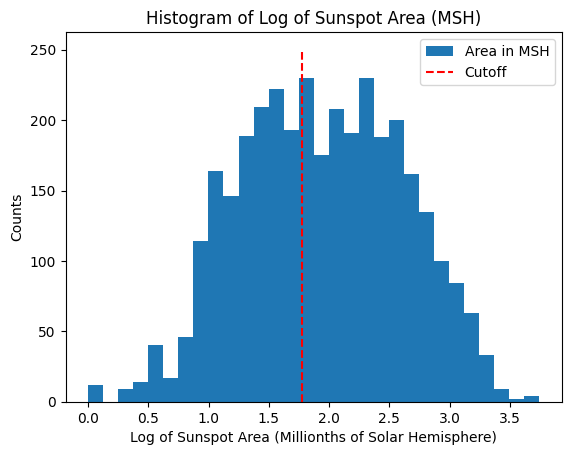

In [ ]:
# we choose 30 bins
nbin = 30

fig,ax = plt.subplots()
ax.hist(logarea_whole, bins=nbin, label='Area in MSH')
ax.vlines(np.log10(60), ymin=0, ymax=250, color='r', linestyle='dashed', label='Cutoff')
ax.set_xlabel("Log of Sunspot Area (Millionths of Solar Hemisphere)")
ax.set_ylabel("Counts")
ax.set_title('Histogram of Log of Sunspot Area (MSH)')
ax.legend()
fig.show()

If we include the data below the cutoff of 60 MSH, we see that the data does get close to approximating a normal (when the log of the sunspot area is graphed). However, the data below the cutoff is not perfectly normal and features a steeper drop off than expected, which represents the issues with the lower data as claimed by the paper being referenced for the project.

As shown below, excluding the data with an area below 60 MSH, provides a closer approximation to a truncated normal, which can more accurately be processed with Monte Carlo simulation.

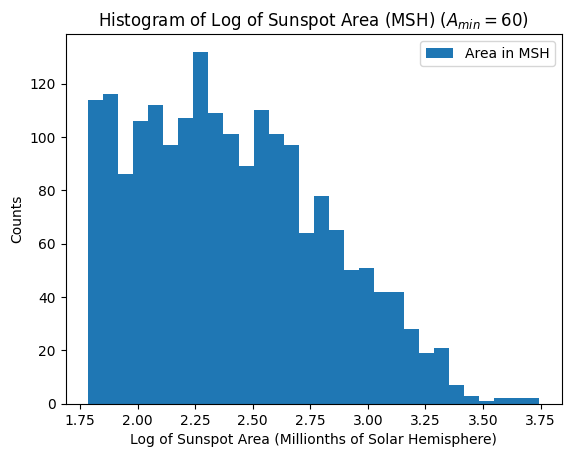

In [ ]:
fig,ax = plt.subplots()
ax.hist(logarea, bins=nbin, label='Area in MSH')
ax.set_xlabel("Log of Sunspot Area (Millionths of Solar Hemisphere)")
ax.set_ylabel("Counts")
ax.set_title(r'Histogram of Log of Sunspot Area (MSH) ($A_{min}=60$)')
ax.legend()
fig.show()

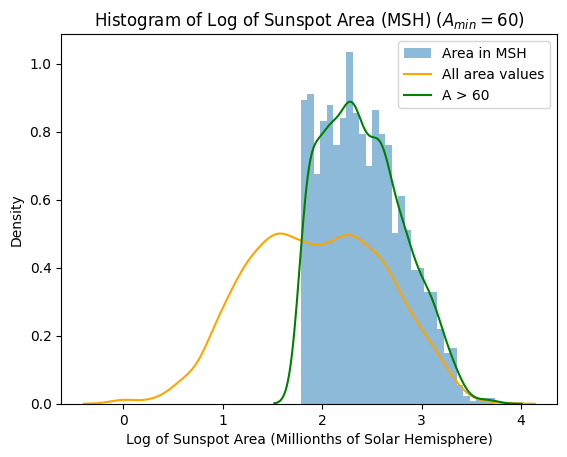

In [ ]:
fig,ax = plt.subplots()
ax.hist(logarea, bins=nbin, label='Area in MSH', density=True, alpha=0.5)
ax.set_xlabel("Log of Sunspot Area (Millionths of Solar Hemisphere)")
ax.set_ylabel("Density")
ax.set_title(r'Histogram of Log of Sunspot Area (MSH) ($A_{min}=60$)')
sns.kdeplot(logarea_whole, color='orange', label='All area values')
sns.kdeplot(logarea, color='green', label=r'A > 60')
ax.legend()
fig.show()

To obtain count data that can be used within the Monte Carlo simulations, we bin our log of the area vs. count data. The value we use to represent the predictor (log of the area) is the center of the bin, which is calculated below.

In [ ]:
#creating data set
count, bins = np.histogram(logarea, nbin)

# average value of bin
bin_avg = (bins[:-1] + bins[1:]) / 2

[]

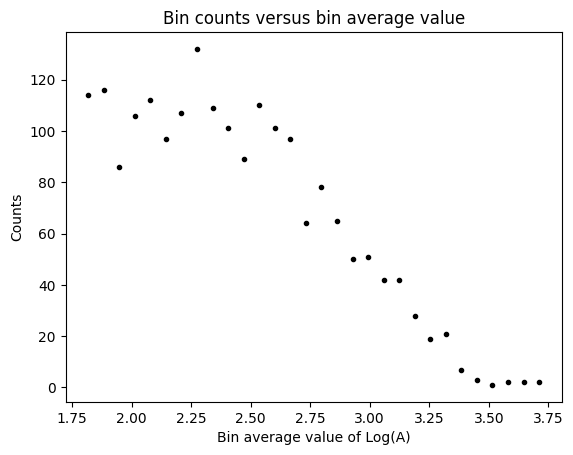

In [ ]:
fig,ax = plt.subplots()
ax.plot(bin_avg, count, "k.")
ax.set_xlabel("Bin average value of Log(A)")
ax.set_ylabel("Counts")
ax.set_title('Bin counts versus bin average value')
ax.plot()

### Statistical Model   

1. $\theta$, the log (base 10) area of sunspot  
2. $\Theta \in (1.78, \infty)^{n}$, set of all log of sunspot areas greater than 1.78(i.e. $\log60$)  
3. Observed areas in MSH, $x = [1.79, 3.74]$  
4. Sample space, $\mathbb{X} \in (1.78, \infty)^{n}$  
5. $X|\theta \in \mathrm{TruncatedNormal}(\mu,\tau,a=60)$, truncated at lower bound of 60
6. Priors on the normal parameters: $$\mu\sim Normal(0,1/1000)$$ $$\tau\sim Gamma(1,1)$$